# Pandas

* Pandas can roughly be interpreted as "python data analysis", but the name originally came from "panel data"
* Its data is stored in numpy arrays, and many concepts are the same.  But a lot nicer interface for data analysis.  It provides more high-level support for typical data processing.

These examples come directly from "10 minutes to Pandas" from the Pandas documentation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range('20130101', periods=6, freq='D')
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.293640,-0.187080,0.085957,1.267893
2013-01-02,2.259948,0.979269,-1.384955,0.823785
2013-01-03,-0.478173,0.411445,-0.640691,-0.641351
2013-01-04,0.119649,-1.785962,-0.756953,-2.106910
2013-01-05,-0.729915,-0.643425,-0.003694,-0.361996
2013-01-06,-1.311546,2.067052,0.684508,-0.598904


In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [ ]:
df.head()

In [ ]:
df.tail(3)

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.values

In [ ]:
df2.values

In [ ]:
df.describe()

In [ ]:
df.T

In [ ]:
df.sort_values(by='B')

# Selection and indexing
Pandas does selection more intuitively than numpy - but that can mean inconsistent sometimes.

In [ ]:
# Select columns
df['A']      # same as df.A.  Problem?

In [ ]:
# Select rows - note same syntax as above.  What happens if there is ambiguity?
df['A':'B']

In [ ]:
df['20130102':'20130104']

In [ ]:
df.loc[dates[0]]

In [ ]:
df.loc[:,['A','B']]


In [ ]:
df.loc[:,['A','B']]

In [ ]:
df.loc['20130102',['A','B']]

In [ ]:
df.loc[dates[0],'A']


In [ ]:
df.at[dates[0],'A']

In [ ]:
df.iloc[3]

In [ ]:
df.iloc[3:5,0:2]

In [ ]:
df.iloc[3:5,0:2]

In [ ]:
df.iloc[3:5,0:2]

In [ ]:
df.iloc[:,1:3]

In [ ]:
df.iloc[1,1]

In [ ]:
df.iloc[1,1]

In [ ]:
df[df.B > 0]

In [ ]:
df[df > 0]

In [ ]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

In [ ]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
df['F'] = s1
df

In [ ]:
df.at[dates[0],'A'] = 0

# Missing data
Missing data handling is one of the nicest features of pandas:

In [7]:
df

,A,B,C,D
2013-01-01,-0.293640,-0.187080,0.085957,1.267893
2013-01-02,2.259948,0.979269,-1.384955,0.823785
2013-01-03,-0.478173,0.411445,-0.640691,-0.641351
2013-01-04,0.119649,-1.785962,-0.756953,-2.106910
2013-01-05,-0.729915,-0.643425,-0.003694,-0.361996
2013-01-06,-1.311546,2.067052,0.684508,-0.598904


In [12]:
dates[:1]

DatetimeIndex(['2013-01-01'], dtype='datetime64[ns]', freq='D')

In [8]:

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,E
2013-01-01,-0.293640,-0.187080,0.085957,1.267893,NaN
2013-01-02,2.259948,0.979269,-1.384955,0.823785,NaN
2013-01-03,-0.478173,0.411445,-0.640691,-0.641351,NaN
2013-01-04,0.119649,-1.785962,-0.756953,-2.106910,NaN


In [10]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,E
2013-01-01,-0.293640,-0.187080,0.085957,1.267893,1.0
2013-01-02,2.259948,0.979269,-1.384955,0.823785,1.0
2013-01-03,-0.478173,0.411445,-0.640691,-0.641351,NaN
2013-01-04,0.119649,-1.785962,-0.756953,-2.106910,NaN


In [13]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.293640,-0.187080,0.085957,1.267893,1.0
2013-01-02,2.259948,0.979269,-1.384955,0.823785,1.0


In [14]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.293640,-0.187080,0.085957,1.267893,1.0
2013-01-02,2.259948,0.979269,-1.384955,0.823785,1.0
2013-01-03,-0.478173,0.411445,-0.640691,-0.641351,5.0
2013-01-04,0.119649,-1.785962,-0.756953,-2.106910,5.0


# Operations

Operations generally do the right things in the face of missing data!

In [18]:
df1

,A,B,C,D,E
2013-01-01,-0.293640,-0.187080,0.085957,1.267893,1.0
2013-01-02,2.259948,0.979269,-1.384955,0.823785,1.0
2013-01-03,-0.478173,0.411445,-0.640691,-0.641351,NaN
2013-01-04,0.119649,-1.785962,-0.756953,-2.106910,NaN


In [17]:
df1.describe()

,A,B,C,D,E
count,4.000000,4.000000,4.000000,4.000000,2.0
mean,0.401946,-0.145582,-0.674160,-0.164146,1.0
std,1.263634,1.192775,0.603043,1.530664,0.0
min,-0.478173,-1.785962,-1.384955,-2.106910,1.0
25%,-0.339773,-0.586801,-0.913953,-1.007741,1.0
50%,-0.086996,0.112182,-0.698822,0.091217,1.0
75%,0.654723,0.553401,-0.459029,0.934812,1.0
max,2.259948,0.979269,0.085957,1.267893,1.0


In [23]:
df.mean()

A   -0.072280
B    0.140217
C   -0.335971
D   -0.269581
dtype: float64

In [26]:
df.mean(axis=1)

2013-01-01    0.218282
2013-01-02    0.669512
2013-01-03   -0.337192
2013-01-04   -1.132544
2013-01-05   -0.434757
2013-01-06    0.210277
Freq: D, dtype: float64

In [28]:
df.var()

A    1.531628
B    1.784330
C    0.540051
D    1.438052
dtype: float64

# Time series

In [42]:
rng = pd.date_range('1/1/2012', periods=1000, freq='S')

In [43]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [44]:
ts.resample('5Min').mean()

2012-01-01 00:00:00    234.980000
2012-01-01 00:05:00    244.306667
2012-01-01 00:10:00    239.890000
2012-01-01 00:15:00    245.580000
Freq: 5T, dtype: float64

In [46]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [49]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-06   -0.221228
2012-03-07   -0.738768
2012-03-08   -0.050720
2012-03-09   -0.734359
2012-03-10   -2.774279
Freq: D, dtype: float64

In [50]:
import time
time.time()

1524476156.3012416

In [51]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.221228
2012-03-07 00:00:00+00:00   -0.738768
2012-03-08 00:00:00+00:00   -0.050720
2012-03-09 00:00:00+00:00   -0.734359
2012-03-10 00:00:00+00:00   -2.774279
Freq: D, dtype: float64

In [53]:
ts_utc.tz_convert('Europe/Helsinki')

2012-03-06 02:00:00+02:00   -0.221228
2012-03-07 02:00:00+02:00   -0.738768
2012-03-08 02:00:00+02:00   -0.050720
2012-03-09 02:00:00+02:00   -0.734359
2012-03-10 02:00:00+02:00   -2.774279
Freq: D, dtype: float64

In [55]:
ts_utc.tz_convert('Europe/Helsinki').tz_localize("America/Eastern")

TypeError: Already tz-aware, use tz_convert to convert.

In [56]:
rng = pd.date_range('1/1/2012', periods=5, freq='D')

In [57]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [58]:
ts

2012-01-01   -1.560053
2012-01-02   -0.810240
2012-01-03   -1.696980
2012-01-04    0.129863
2012-01-05   -0.382735
Freq: D, dtype: float64

# Data alignment
Data alignment based on indexing, combined with missing data handling, is another of the most useful things in pandas

In [60]:
dates = pd.date_range('1/1/2012', periods=10, freq='D')
dates

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10'],
              dtype='datetime64[ns]', freq='D')

In [63]:
ts = pd.Series(np.random.randint(0, 10, len(dates)), index=dates)

In [64]:
ts

2012-01-01    7
2012-01-02    6
2012-01-03    8
2012-01-04    6
2012-01-05    8
2012-01-06    8
2012-01-07    9
2012-01-08    6
2012-01-09    9
2012-01-10    4
Freq: D, dtype: int64

In [66]:
ts[:5] + ts

2012-01-01    14.0
2012-01-02    12.0
2012-01-03    16.0
2012-01-04    12.0
2012-01-05    16.0
2012-01-06     NaN
2012-01-07     NaN
2012-01-08     NaN
2012-01-09     NaN
2012-01-10     NaN
Freq: D, dtype: float64

In [69]:
ts[:5].reindex(ts.index).fillna(0)

2012-01-01    7.0
2012-01-02    6.0
2012-01-03    8.0
2012-01-04    6.0
2012-01-05    8.0
2012-01-06    0.0
2012-01-07    0.0
2012-01-08    0.0
2012-01-09    0.0
2012-01-10    0.0
Freq: D, dtype: float64

In [70]:
dates1 = pd.date_range('1/1/2012', periods=10, freq='D')
ts1    = pd.Series(np.random.randint(0, 10, len(dates1)), index=dates1)
dates2 = pd.date_range('1/5/2012', periods=10, freq='D')
ts2    = pd.Series(np.random.randint(0, 10, len(dates2)), index=dates2)
ts1 + ts2

2012-01-01     NaN
2012-01-02     NaN
2012-01-03     NaN
2012-01-04     NaN
2012-01-05    13.0
2012-01-06     4.0
2012-01-07     3.0
2012-01-08     7.0
2012-01-09     9.0
2012-01-10     5.0
2012-01-11     NaN
2012-01-12     NaN
2012-01-13     NaN
2012-01-14     NaN
Freq: D, dtype: float64

# Plotting
We'll do this later (day 3), but for now...

In [71]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.head()

2000-01-01   -0.272802
2000-01-02   -0.039713
2000-01-03   -1.545006
2000-01-04    0.059426
2000-01-05    0.739346
Freq: D, dtype: float64

In [72]:
ts = ts.cumsum()
ts.head()

2000-01-01   -0.272802
2000-01-02   -0.312515
2000-01-03   -1.857522
2000-01-04   -1.798096
2000-01-05   -1.058750
Freq: D, dtype: float64

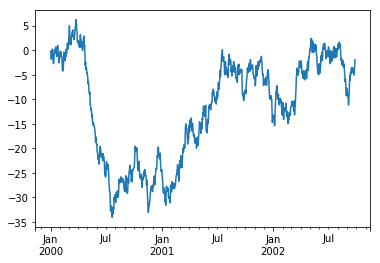

In [73]:
ts.plot()

# Reading data in pandas
There is lots of support for automatically reading in data in various formats.  Let's use the same dataset as last time, and see what new we can do.

In [75]:
iris = pd.read_csv('../data/iris.data',
                   names=('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'type'))
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
type           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [77]:
iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exercises 04
These exercises are taken with pride from https://github.com/ajcr/100-pandas-puzzles

## DataFrame basics


Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [78]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


In [94]:
df = pd.DataFrame(data, index=labels)
df.head()

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2


**5.** Display a summary of the basic information about this DataFrame and its data.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


In [96]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**6.** Return the first 3 rows of the DataFrame `df`.

In [100]:
df.iloc[:3]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [101]:
df[["animal", "age"]]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [102]:
df.loc[df.index[[3,4,8]], ["animal", "age"]]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**9.** Select only the rows where the number of visits is greater than 3.

In [107]:
df[df.visits > 3]

,age,animal,priority,visits


**10.** Select the rows where the age is missing, i.e. is `NaN`.

In [110]:
df[df['age'].isnull()]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [115]:
df[(df.animal == 'cat') & (df.age < 3)]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [120]:
df[df.age.between(2,4)]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


**13.** Change the age in row 'f' to 1.5.

In [124]:
df.loc["f", "age"] = 1.5
df.loc["f", "age"]

1.5

**14.** Calculate the sum of all visits (the total number of visits).

In [125]:
df.visits.sum()

19

**15.** Calculate the mean age for each different animal in `df`.

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [133]:
df.loc["k"] = [5.5, 'dog', 'no', 2]
df.tail()
df = df.drop('k')

**17.** Count the number of each type of animal in `df`.

In [134]:
df['animal'].value_counts()

dog      4
cat      4
snake    2
Name: animal, dtype: int64

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order.

In [136]:
df.sort_values(by=["age", "visits"], ascending=[False, True])

,age,animal,priority,visits
i,7.0,dog,no,2
e,5.0,dog,no,2
g,4.5,snake,no,1
j,3.0,dog,no,1
b,3.0,cat,yes,3
a,2.5,cat,yes,1
f,1.5,cat,no,3
c,0.5,snake,no,2
h,NaN,cat,yes,1
d,NaN,dog,yes,3


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [146]:
df['priority']

a     True
b     True
c    False
d     True
e    False
f    False
g    False
h     True
i    False
j    False
Name: priority, dtype: bool

**20.** In the 'animal' column, change the 'snake' entries to 'python'.

a       cat
b       cat
c    python
d       dog
e       dog
f       cat
g    python
h       cat
i       dog
j       dog
Name: animal, dtype: object

**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? (Find that column's label.)

**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

In [ ]:
len(df) - df.duplicated(keep=False).sum()

The next three puzzles are slightly harder...

**26.** You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries in each row are NaN values. For each row of the DataFrame, find the *column* which contains the *third* NaN value.

(You should return a Series of column labels.)

**27.** A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example: 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.

**28.** A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.